In [1]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)

In [2]:
download("https://github.com/AllenDowney/ThinkStats/raw/v3/nb/thinkstats.py")

In [67]:
from empiricaldist import FreqTab, Pmf
import numpy as np
import pandas as pd
from thinkstats import two_bar_plots, decorate
from nsfg import get_nsfg_groups, read_fem_resp
import matplotlib.pyplot as plt

In [4]:
df = FreqTab.from_seq([1, 2, 2, 3, 5])
df

,freqs
1,1
2,2
3,1
5,1


In [5]:
n = df.sum()
n 

np.int64(5)

In [6]:
pmf = df / n
pmf

,probs
1,0.2
2,0.4
3,0.2
5,0.2


In [7]:
pmf.sum()

np.float64(1.0)

In [8]:
pmf = Pmf.from_seq([1, 2, 2, 3, 5])
pmf

,probs
1,0.2
2,0.4
3,0.2
5,0.2


In [9]:
pmf.sum()

np.float64(1.0)

In [10]:
pmf[2]

np.float64(0.4)

In [11]:
pmf(2)

np.float64(0.4)

In [12]:
pmf[2] = 0.2
pmf(2)

np.float64(0.2)

In [13]:
pmf[2] += 0.3
pmf(2)

np.float64(0.5)

In [14]:
pmf[2] *= 0.5
pmf(2)

np.float64(0.25)

In [15]:
pmf.sum()

np.float64(0.8500000000000001)

In [16]:
pmf.normalize()

np.float64(0.8500000000000001)

In [17]:
pmf.sum()

np.float64(1.0)

In [18]:
pmf

,probs
1,0.235294
2,0.294118
3,0.235294
5,0.235294


In [19]:
seq = [1, 2, 2, 3, 5]
n = len(seq)
mean = np.sum(seq) / n
mean

np.float64(2.6)

In [20]:
pmf = Pmf.from_seq(seq)
np.sum(pmf.ps * pmf.qs)
mean

np.float64(2.6)

In [21]:
pmf.mean()

np.float64(2.6)

In [22]:
deviations = pmf.qs - mean
deviations

array([-1.6, -0.6,  0.4,  2.4])

In [23]:
var = np.sum(pmf.ps * deviations ** 2)
var

np.float64(1.84)

In [24]:
pmf.var()

np.float64(1.84)

In [25]:
np.sqrt(var)

np.float64(1.3564659966250536)

In [26]:
pmf.std()

np.float64(1.3564659966250536)

In [27]:
pmf.mode()

np.int64(2)

In [28]:
ranges = pd.interval_range(start = 5, end = 50, freq = 5, closed = "left")
ranges.name = "class size"
df = pd.DataFrame(index = ranges)
df["count"] = [8,8,14,4,6,12,8,3,2]
df

,count
class size,
"[5, 10)",8
"[10, 15)",8
"[15, 20)",14
"[20, 25)",4
"[25, 30)",6
"[30, 35)",12
"[35, 40)",8
"[40, 45)",3
"[45, 50)",2


In [29]:
sizes = ranges.left + 2
sizes

Index([7, 12, 17, 22, 27, 32, 37, 42, 47], dtype='int64')

In [30]:
counts = df['count']
actual_pmf = Pmf(counts, sizes, name = "actual")
actual_pmf.normalize()

np.int64(65)

In [31]:
actual_pmf.mean()

np.float64(23.692307692307693)

In [32]:
def bias(pmf, name):
    ps = pmf.ps * pmf.qs
    new_pmf = Pmf(ps, pmf.qs, name = name)
    new_pmf.normalize()
    return new_pmf

In [33]:
observed_pmf = bias(actual_pmf, name = "Observed")

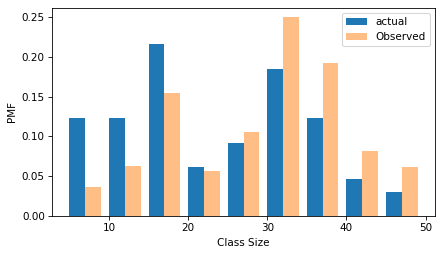

In [34]:
two_bar_plots(actual_pmf, observed_pmf, width = 2)
decorate(xlabel = "Class Size", ylabel = "PMF")

In [35]:
observed_pmf.mean()

np.float64(29.123376623376622)

In [36]:
def unbias(pmf, name):
    ps = pmf.ps / pmf.qs
    new_pmf = Pmf(ps, pmf.qs, name = name)
    new_pmf.normalize()
    return new_pmf

In [37]:
debiased_pmf = unbias(observed_pmf, "debiased")
debiased_pmf.mean()

np.float64(23.692307692307693)

In [38]:
live, firsts, others = get_nsfg_groups()
first_pmf = Pmf.from_seq(firsts["prglngth"], name = "firsts")
other_pmf = Pmf.from_seq(others["prglngth"], name = "others")

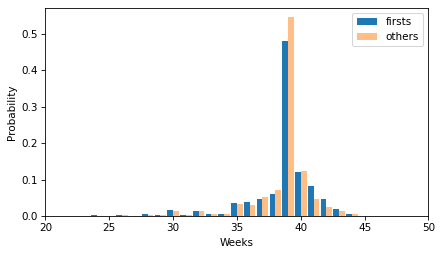

In [39]:
two_bar_plots(first_pmf, other_pmf)
decorate(xlabel = "Weeks", ylabel = "Probability", xlim = [20,50])

In [40]:
weeks = range(35, 46)
first_pmf(weeks)

array([0.03602991, 0.03897575, 0.04713347, 0.06163608, 0.4790392 ,
       0.12145932, 0.08157716, 0.04645366, 0.01971448, 0.00521187,
       0.00135962])

In [41]:
other_pmf(weeks)

array([0.03210137, 0.03146779, 0.05216473, 0.07074974, 0.54466737,
       0.12249208, 0.04794087, 0.02597677, 0.01288279, 0.00485744,
       0.00084477])

In [42]:
diffs = first_pmf(weeks) - other_pmf(weeks)
diffs

array([ 0.00392854,  0.00750796, -0.00503126, -0.00911366, -0.06562817,
       -0.00103276,  0.03363629,  0.02047689,  0.00683169,  0.00035443,
        0.00051485])

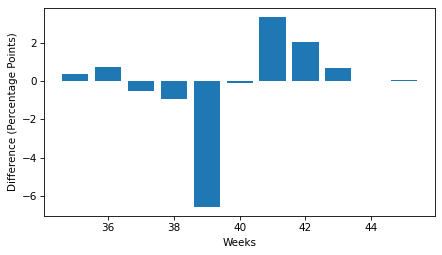

In [43]:
plt.bar(weeks, diffs * 100)
decorate(xlabel = "Weeks", ylabel = "Difference (Percentage Points)")

In [44]:
df = read_fem_resp()
df.shape

(7643, 3092)

In [45]:
df['numbabes'].value_counts()

numbabes
0     3229
2     1603
1     1519
3      828
4      309
5       95
6       29
7       15
8        8
10       3
9        2
22       1
97       1
16       1
Name: count, dtype: int64

In [46]:
df['numbabes'] = df['numbabes'].replace([22, 97, 98, 99], np.nan)

In [47]:
ftab_babes = FreqTab.from_seq(df['numbabes'], name="numbabes")
ftab_babes

,freqs
numbabes,
0.0,3229
1.0,1519
2.0,1603
3.0,828
4.0,309
5.0,95
6.0,29
7.0,15
8.0,8


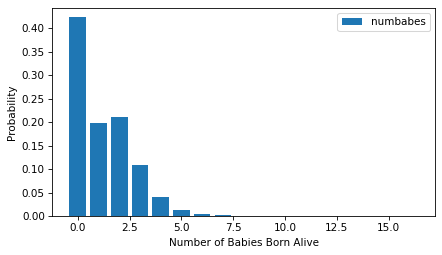

In [48]:
pmf_babes = Pmf.from_seq(df['numbabes'].dropna(), name='numbabes')
pmf_babes.bar()
decorate(xlabel="Number of Babies Born Alive", ylabel="Probability")

In [63]:
df['numbabes'] = df['numbabes'].replace([97], np.nan)
pmf = Pmf.from_seq(df['numbabes'].dropna(), name="numbabes")

In [64]:
def pmf_skewness(pmf):
    mean = np.sum(pmf.ps * pmf.qs)
    deviation = pmf.qs - mean
    skewness = np.sum(pmf.ps * deviation**3) / (np.std(pmf.qs, ddof=0) ** 3)
    return skewness

In [65]:
pmf_skewness(pmf)

np.float64(0.04316177163954396)

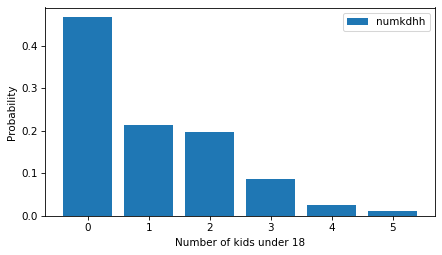

In [68]:
pmf = Pmf.from_seq(df['numkdhh'].dropna(), name="numkdhh")
pmf.bar()
decorate(xlabel="Number of kids under 18", ylabel="Probability")

In [69]:
def bias_pmf(pmf):
    biased = pmf.copy()
    biased.ps = biased.qs * biased.ps
    biased.normalize()
    return biased

In [79]:
def bias_pmf(pmf):
    biased = pmf.copy()
    values = biased.qs   
    probs = biased.ps    

    new_probs = values * probs  
    biased = Pmf(new_probs)
    biased.normalize()
    return biased

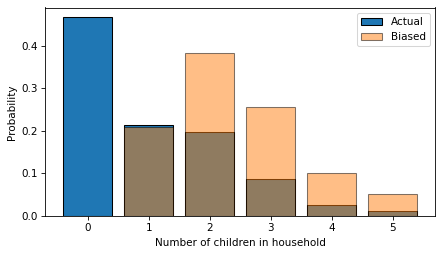

In [81]:
biased = bias_pmf(pmf)

pmf.bar(label="Actual", edgecolor='black')
biased.bar(label="Biased", alpha=0.5, edgecolor='black')
decorate(xlabel="Number of children in household", ylabel="Probability")

In [82]:
actual_mean = np.sum(pmf.ps * pmf.qs)
biased_mean = np.sum(biased.ps * biased.qs)

print("Actual Mean:", actual_mean)
print("Biased Mean:", biased_mean)


Actual Mean: 1.024205155043831
Biased Mean: 2.403679100664282
